In [39]:
import pandas as pd
import plotly.graph_objects as go
import warnings
import plotly

warnings.filterwarnings('ignore')

beirut_population = pd.read_csv('../data/beirut_population.csv')

beirut_population

,Year,Population,GrowthRate,Growth
0,2035,2303801,-0.0006,-7261
1,2030,2311062,-0.0058,-68264
2,2025,2379326,-0.0037,-45099
3,2020,2424425,0.0073,17550
4,2019,2406875,0.0194,178170
5,2015,2228705,0.0229,238442
6,2010,1990263,0.0229,212915
7,2005,1777348,0.0364,290662
8,2000,1486686,0.0324,218898
9,1995,1267788,-0.0039,-24741


In [40]:
war_years = range(1975, 1990)

beirut_population = beirut_population.loc[4:]

beirut_population['in_war'] = beirut_population.apply(lambda row: row['Year'] in war_years, axis=1)

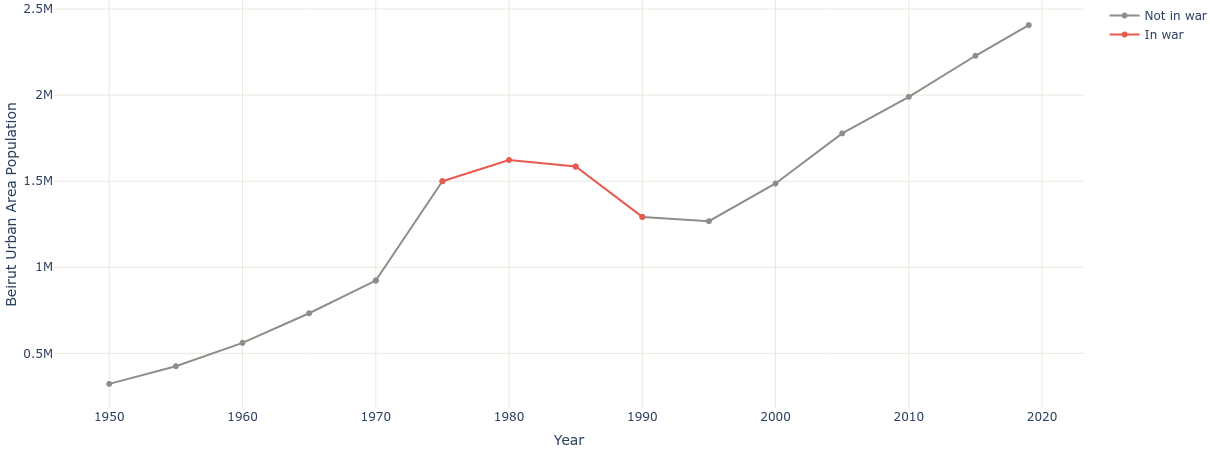

In [41]:
pop_in_war = beirut_population.copy()
pop_no_war = beirut_population.copy()

link_before = pd.DataFrame({
    'Year': [1970, 1975],
    'Population': [922842, 1500000],
    'in_war': [False, False]
})

link_after = pd.DataFrame({
    'Year': [1985, 1990],
    'Population': [1585107, 1292529],
    'in_war': [True, True]
})

pop_no_war = pop_no_war.append(link_before).sort_values(by='Year')
pop_in_war = pop_in_war.append(link_after).sort_values(by='Year')

pop_in_war['Population'][~pop_in_war['in_war']] = None
pop_no_war['Population'][pop_no_war['in_war']] = None

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=pop_no_war["Year"], y=pop_no_war["Population"],
                mode='lines+markers',
                name='Not in war',
                connectgaps=False,
                line=dict(color='RGB(142, 141, 138)', width=2
        )
    )
)


fig.add_trace(
    go.Scatter(
            x=pop_in_war["Year"],
            y=pop_in_war["Population"],
            mode='lines+markers',
            name='In war',
            connectgaps=False,
            line=dict(color='RGB(232, 90, 79)', width=2
        )
    )
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Beirut Urban Area Population',
    plot_bgcolor = "White",
    margin=dict(l=0, r=5, t=0, b=0),
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='RGB(234, 231, 220)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='RGB(234, 231, 220)')

fig.show()

In [42]:
plotly.offline.plot(fig, filename='../plots/beirut-population.html')

'../plots/beirut-population.html'